<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/Jp_Probador2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# proyecto Final - TalentoTech
## Modelo para la prediccion de proyectos de energia renobvable en los municipios de Colombia

_El proyecto fue realizado en el marco del curso de Machine Learning TalentoTech_

## Descripcion 🚀

_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._


### Tecnologias utilizdas 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_



* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikit_learn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />


## Autores 😊


* **Monica Garcia**
* **Juan Pablo Cardenas....**
* **Juan Pablo Quevedo....**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**



## Tareas  ✒️

 1. Importar librerías necesarias[1]
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

## Preguntas
### 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
### 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

# 1. Importar librerías necesarias[1]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
!pip install sodapy

In [3]:
from sodapy import Socrata

In [4]:
client = Socrata("www.datos.gov.co", None)

# 2. Cargar los Datos

* Dataframe 1- Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [5]:
results1 = client.get("3ebi-d83g", limit=5000)

In [6]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [7]:
#Analisis dataframe
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [8]:
df1 = pd.DataFrame(
    {'municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     #'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     #'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         4273 non-null   object
 1   potencia_m        4273 non-null   object
 2   energia_activa    4273 non-null   object
 3   energia_reactiva  4273 non-null   object
dtypes: object(4)
memory usage: 133.7+ KB


In [10]:
df1.isnull().sum()

,0
municipio,0
potencia_m,0
energia_activa,0
energia_reactiva,0


In [11]:
#pasa  los datos a numericos
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
#df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
#df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,municipio,potencia_m,energia_activa,energia_reactiva
0,PUERTO NARIÑO,286.40,132215,41907.0
1,TARAPACA (ANM),102.60,28132,12662.0
2,VIGÍA DEL FUERTE,27.46,2686,1110.0
3,PROVIDENCIA,2190.28,1331271,284638.0
4,CARTAGENA DE INDIAS,247.59,64368,30561.0
...,...,...,...,...
4268,BUENAVENTURA,31.23,7610,3285.0
4269,CARURÚ,87.82,31775,7881.0
4270,MITÚ,3236.71,1590470,387197.0
4271,TARAIRA,136.84,39226,10719.0


In [12]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         4273 non-null   object 
 1   potencia_m        4273 non-null   float64
 2   energia_activa    4273 non-null   int64  
 3   energia_reactiva  4273 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 133.7+ KB


Media: 719.5513058740931
Mediana: 68.0


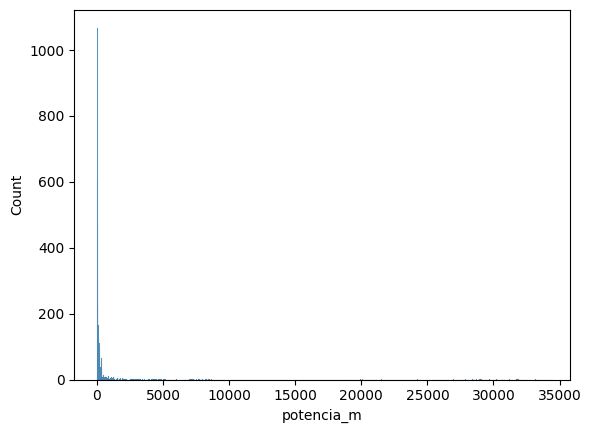

In [13]:
sns.histplot(df1['potencia_m'])
print('Media:', df1['potencia_m'].mean())
print('Mediana:', df1['potencia_m'].median())

In [14]:
'''sns.histplot(df1['prom_diaria'])
print('Media:', df1['prom_diaria'].mean())
print('Mediana:', df1['prom_diaria'].median())'''

"sns.histplot(df1['prom_diaria'])\nprint('Media:', df1['prom_diaria'].mean())\nprint('Mediana:', df1['prom_diaria'].median())"

Media: 371828.4984788205
Mediana: 12587.0


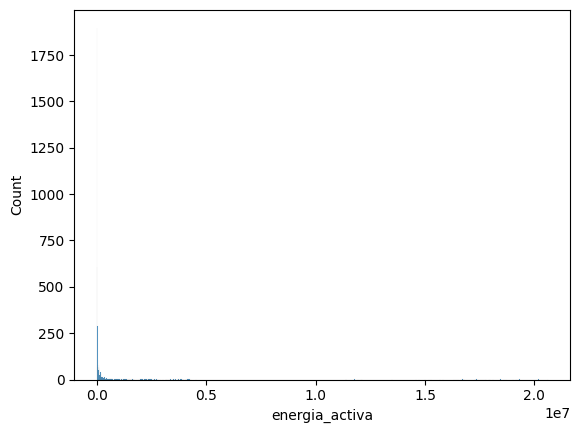

In [15]:
sns.histplot(df1['energia_activa'])
print('Media:', df1['energia_activa'].mean())
print('Mediana:', df1['energia_activa'].median())

Media: 110055.47112333255
Mediana: 5113.0


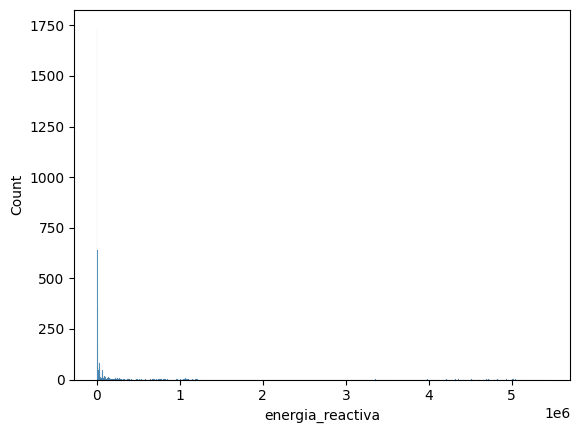

In [16]:
sns.histplot(df1['energia_reactiva'])
print('Media:', df1['energia_reactiva'].mean())
print('Mediana:', df1['energia_reactiva'].median())

<Axes: >

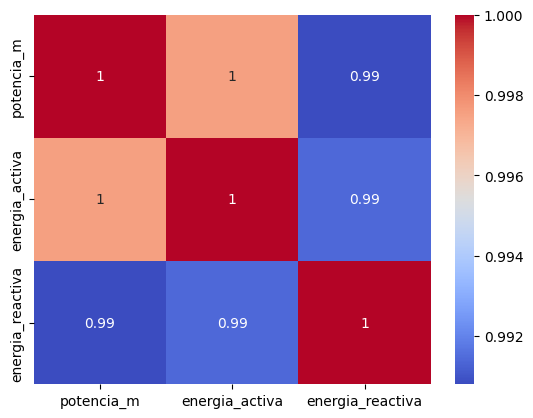

In [17]:
#Analisis de correlacion entre las variables de interes
correlacion1 = df1[['potencia_m', 'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ebb916d7910>,
 'caps': [<matplotlib.lines.Line2D at 0x7ebb916d7e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ebb916d7670>],
 'medians': [<matplotlib.lines.Line2D at 0x7ebb917503d0>],
 'fliers': [],
 'means': []}

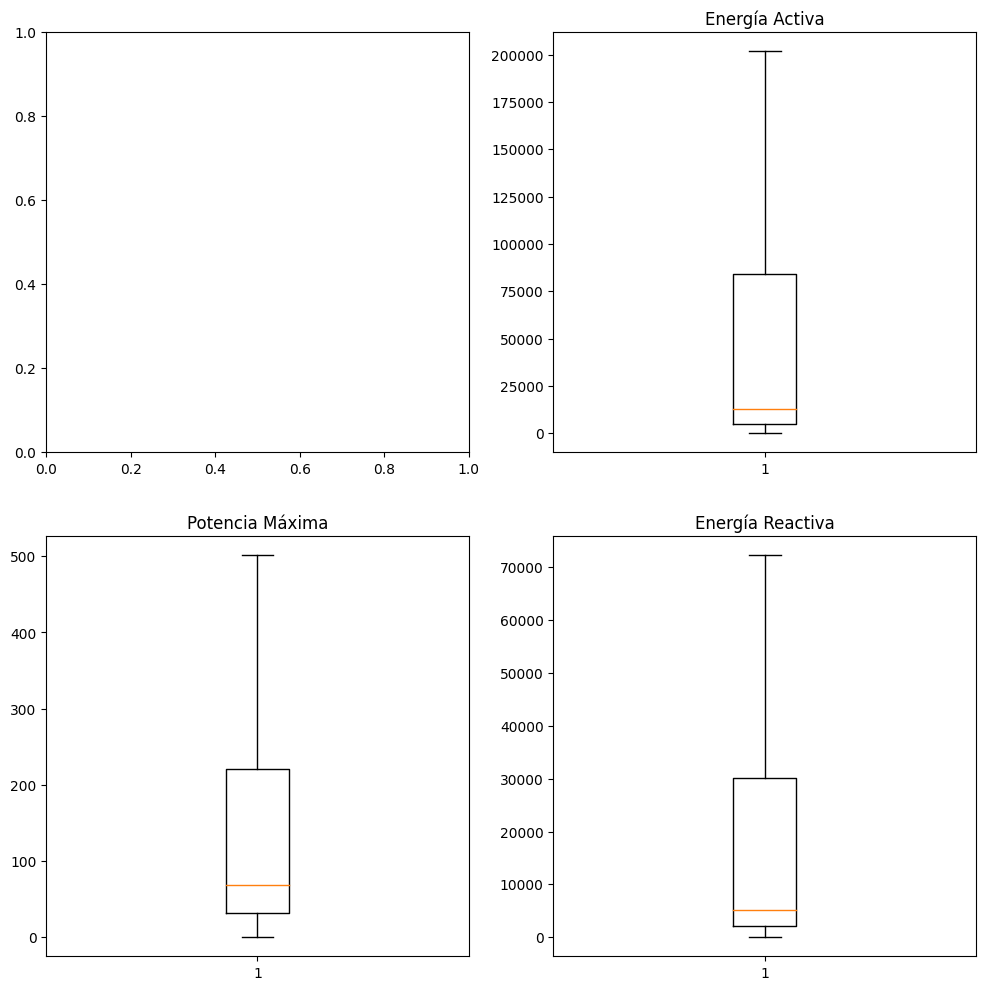

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
#ax[0][0].set_title('Promedio Diaria')
ax[1][0].set_title('Potencia Máxima')
ax[0][1].set_title('Energía Activa')
ax[1][1].set_title('Energía Reactiva')

#boxplots.
#ax[0][0].boxplot(x=df1['prom_diaria'], showfliers=False)
ax[1][0].boxplot(x=df1['potencia_m'], showfliers=False)
ax[0][1].boxplot(x=df1['energia_activa'], showfliers=False)
ax[1][1].boxplot(x=df1['energia_reactiva'], showfliers=False)


* Dataframe 2 - Consumo percapita de energia electrica segun su fuente en Colombia-our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


* Dataframe 3 -  FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [19]:
results2 = client.get("vy9n-w6hc", limit=3000)
datos2 = pd.DataFrame.from_records(results2)
datos2.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [20]:
datos2['tipo'].describe()

,tipo
count,158
unique,2
top,Solar
freq,145


In [21]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


In [22]:
df2 = pd.DataFrame(
    {'municipio': datos2['municipio'],
     #'capacidad': datos2['capacidad'],
     'proyectos_existentes': datos2['tipo'],
     #'usuarios': datos2['usuarios'],
     #'energía': datos2['energia_kwh_d_a'],
     #'emisiones': datos2['emisiones_co2_ton_a_o'],
     #'inversion': datos2['inversi_n_estimada_cop']
    }
)


In [23]:
df2.shape

(158, 2)

In [24]:
df2.isnull().sum()

,0
municipio,0
proyectos_existentes,0


In [25]:
df2.dtypes

,0
municipio,object
proyectos_existentes,object


In [26]:
'''#pasamos los datos3 a numericos
for col in ['inversion']:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
df2'''

"#pasamos los datos3 a numericos\nfor col in ['inversion']:\n    df2[col] = pd.to_numeric(df2[col], errors='coerce')\ndf2"

In [27]:
'''cajas = df2[['inversion']]
sns.boxplot(cajas)'''

"cajas = df2[['inversion']]\nsns.boxplot(cajas)"

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   municipio             158 non-null    object
 1   proyectos_existentes  158 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


* Dataframe 3 -  Velocidad del viento en los municipios de colombia
[vínculo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8/about_data)

In [29]:
results3 = client.get("sgfv-3yp8", limit=3000)

In [30]:
datos3 = pd.DataFrame.from_records(results3)
datos3

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0021055070,0103,2012-12-03T18:20:00.000,0.6,INZA - AUT,CAUCA,INZÁ,ALTO MAGDALENA,2.548194444,-76.06394444,Velocidad Viento (10 min),m/s
1,0051025060,0103,2019-02-17T02:30:00.000,14.8,BIOTOPO - AUT,NARIÑO,BARBACOAS,MIRA,1.408638889,-78.28161111,Velocidad Viento (10 min),m/s
2,0021255160,0103,2016-12-09T07:30:00.000,1.7,HACIENDA PAJONALES,TOLIMA,AMBALEMA,ALTO MAGDALENA,4.760722222,-74.83425,Velocidad Viento (10 min),m/s
3,0026215501,0103,2017-03-02T13:45:00.000,1.6,CONCORDIA - AUT,ANTIOQUIA,CONCORDIA,CAUCA,6.042441667,-75.92149722,Velocidad Viento (10 min),m/s
4,0021206950,0103,2014-02-26T17:20:00.000,2.3,PARAMO GUACHENEQUE - AUT,CUNDINAMARCA,VILLAPINZÓN,ALTO MAGDALENA,5.236055556,-73.52508333,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0052055210,0103,2017-12-01T11:10:00.000,2.6,BOTANA - AUT,NARIÑO,PASTO,PATÍA,1.16,-77.27880556,Velocidad Viento (10 min),m/s
2996,0023125160,0103,2010-11-23T16:50:00.000,1.7,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556,Velocidad Viento (10 min),m/s
2997,0029015000,0103,2016-11-11T23:40:00.000,0.8,EL GUAMO - AUT,BOLIVAR,EL GUAMO,BAJO MAGDALENA,10.06444444,-74.85222222,Velocidad Viento (10 min),m/s
2998,0024035380,0103,2013-07-19T04:50:00.000,15.7,NEVADO DEL COCUY - AUT,BOYACÁ,GUICÁN,SOGAMOSO,6.509111111,-72.31416667,Velocidad Viento (10 min),m/s


In [31]:
df3 = pd.DataFrame(
    {'municipio': datos3['municipio'],
     'velocidad_viento': datos3['valorobservado'],
     "longitud": datos3["longitud"],
     "latitud": datos3["latitud"]
    }
)
df3

,municipio,velocidad_viento,longitud,latitud
0,INZÁ,0.6,-76.06394444,2.548194444
1,BARBACOAS,14.8,-78.28161111,1.408638889
2,AMBALEMA,1.7,-74.83425,4.760722222
3,CONCORDIA,1.6,-75.92149722,6.042441667
4,VILLAPINZÓN,2.3,-73.52508333,5.236055556
...,...,...,...,...
2995,PASTO,2.6,-77.27880556,1.16
2996,SAN PABLO DE BORBUR,1.7,-74.07130556,5.647027778
2997,EL GUAMO,0.8,-74.85222222,10.06444444
2998,GUICÁN,15.7,-72.31416667,6.509111111


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         3000 non-null   object
 1   velocidad_viento  3000 non-null   object
 2   longitud          3000 non-null   object
 3   latitud           3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


In [33]:
df3.isnull().sum()

,0
municipio,0
velocidad_viento,0
longitud,0
latitud,0


In [34]:
#pasar la columna velocidad_viento a numérico
df3['velocidad_viento'] = pd.to_numeric(df3['velocidad_viento'], errors='coerce')

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         3000 non-null   object 
 1   velocidad_viento  3000 non-null   float64
 2   longitud          3000 non-null   object 
 3   latitud           3000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 93.9+ KB


* Dataframe 4 -  Dias con lluvia en los municipios de colombia\
  INFORMACIÓN GENERAL ESTACIONES,,,,,,,,,NORMAL CLIMATOLÓGICA ESTÁNDAR DE No DE DÍAS CON LLUVIA ≥ 1 mm PARA EL PERIODO 1991-2020,,,,,,,,,,,,,  Cumplen la directriz No 1203 del 2017 de la OMM,\
[vínculo](http://archivo.ideam.gov.co/web/tiempo-y-clima/clima)

In [36]:
datos4 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
datos4

,CODIGO,CATEGORIA,ESTACIÓN,MUNICIPIO,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,El Encanto,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,El Encanto,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,La Pedrera,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,La Pedrera,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,La Pedrera,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,Puerto Carreño,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,Puerto Carreño,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,Santa Rosalía,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,Santa Rosalía,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [37]:
datos4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CODIGO             1445 non-null   int64 
 1   CATEGORIA          1445 non-null   object
 2   ESTACIÓN           1445 non-null   object
 3   MUNICIPIO          1445 non-null   object
 4   DEPARTAMENTO       1445 non-null   object
 5   AO                 1445 non-null   int64 
 6   ALTITUD (m)        1445 non-null   int64 
 7   LONGITUD           1445 non-null   object
 8   LATITUD            1445 non-null   object
 9   ENE                1445 non-null   object
 10  FEB                1445 non-null   object
 11  MAR                1445 non-null   object
 12  ABR                1445 non-null   object
 13  MAY                1445 non-null   object
 14  JUN                1445 non-null   object
 15  JUL                1445 non-null   object
 16  AGO                1445 non-null   object


In [38]:
df4 = pd.DataFrame(
    {'municipio': datos4['MUNICIPIO'],
     'dias_lluvia': datos4['ANUAL'],
     "longitud": datos4["LONGITUD"],
     "latitud": datos4["LATITUD"]
    }
)
df4

,municipio,dias_lluvia,longitud,latitud
0,El Encanto,"191,7","-73,20","-1,77"
1,El Encanto,"191,1","-73,21","-1,75"
2,La Pedrera,"216,0","-69,47","-1,23"
3,La Pedrera,"161,8","-69,59","-1,31"
4,La Pedrera,"204,0","-70,18","-1,53"
...,...,...,...,...
1440,Puerto Carreño,"133,2","-67,49","6,18"
1441,Puerto Carreño,"130,7","-67,64","5,68"
1442,Santa Rosalía,"98,7","-70,85","5,14"
1443,Santa Rosalía,"113,4","-70,68","5,35"


In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   municipio    1445 non-null   object
 1   dias_lluvia  1445 non-null   object
 2   longitud     1445 non-null   object
 3   latitud      1445 non-null   object
dtypes: object(4)
memory usage: 45.3+ KB


In [40]:
 # elimina espacios en blanco
df4['dias_lluvia'] = df4['dias_lluvia'].str.strip()
df4['municipio'] = df4['municipio'].str.strip()
df4['longitud'] = df4['longitud'].str.strip()
df4['latitud'] = df4['latitud'].str.strip()

In [41]:
 # Cambia comas por puntos en el campo 'dias_lluvia'
df4['dias_lluvia'] = df4['dias_lluvia'].str.replace(',', '.', regex=False)

In [42]:
# conversion a numerico
df4['dias_lluvia'] = pd.to_numeric(df4['dias_lluvia'], errors='coerce')

In [43]:
#pasa municipio a mayusculas
df4['municipio'] = df4['municipio'].str.upper()
df4

,municipio,dias_lluvia,longitud,latitud
0,EL ENCANTO,191.7,"-73,20","-1,77"
1,EL ENCANTO,191.1,"-73,21","-1,75"
2,LA PEDRERA,216.0,"-69,47","-1,23"
3,LA PEDRERA,161.8,"-69,59","-1,31"
4,LA PEDRERA,204.0,"-70,18","-1,53"
...,...,...,...,...
1440,PUERTO CARREÑO,133.2,"-67,49","6,18"
1441,PUERTO CARREÑO,130.7,"-67,64","5,68"
1442,SANTA ROSALÍA,98.7,"-70,85","5,14"
1443,SANTA ROSALÍA,113.4,"-70,68","5,35"


Unificar datos de poblaciones y viento

In [44]:
df_clima = pd.merge(left= df3, right= df4, left_on='municipio', right_on= 'municipio', how='left')
df_clima

,municipio,velocidad_viento,longitud_x,latitud_x,dias_lluvia,longitud_y,latitud_y
0,INZÁ,0.6,-76.06394444,2.548194444,200.5,"-76,10","2,50"
1,INZÁ,0.6,-76.06394444,2.548194444,276.7,"-76,17","2,45"
2,INZÁ,0.6,-76.06394444,2.548194444,144.7,"-76,05","2,58"
3,INZÁ,0.6,-76.06394444,2.548194444,227.4,"-76,16","2,24"
4,INZÁ,0.6,-76.06394444,2.548194444,170.1,"-76,05","2,46"
...,...,...,...,...,...,...,...
7504,GUICÁN,15.7,-72.31416667,6.509111111,171.8,"-72,38","6,41"
7505,PAIPA,0.7,-73.11636111,5.745916667,107.9,"-73,07","5,70"
7506,PAIPA,0.7,-73.11636111,5.745916667,189.7,"-73,16","5,97"
7507,PAIPA,0.7,-73.11636111,5.745916667,169.2,"-73,20","5,90"


In [45]:
df_climas = pd.DataFrame(
    {'municipio': df_clima['municipio'],
     'velocidad_viento': df_clima['velocidad_viento'],
     'dias_lluvia': df_clima['dias_lluvia'],
     'longitud': df_clima['longitud_y'],
     "latitud": df_clima["latitud_y"]
    }
)
df_climas

,municipio,velocidad_viento,dias_lluvia,longitud,latitud
0,INZÁ,0.6,200.5,"-76,10","2,50"
1,INZÁ,0.6,276.7,"-76,17","2,45"
2,INZÁ,0.6,144.7,"-76,05","2,58"
3,INZÁ,0.6,227.4,"-76,16","2,24"
4,INZÁ,0.6,170.1,"-76,05","2,46"
...,...,...,...,...,...
7504,GUICÁN,15.7,171.8,"-72,38","6,41"
7505,PAIPA,0.7,107.9,"-73,07","5,70"
7506,PAIPA,0.7,189.7,"-73,16","5,97"
7507,PAIPA,0.7,169.2,"-73,20","5,90"


In [46]:
df_climas.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,772
longitud,772
latitud,772


<Axes: xlabel='dias_lluvia', ylabel='Count'>

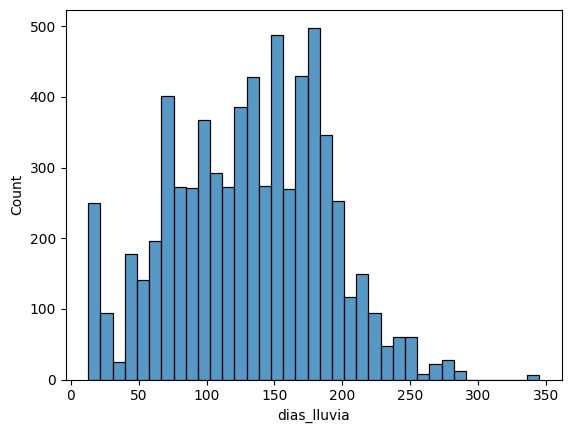

In [47]:
sns.histplot(df_climas['dias_lluvia'])

<Axes: xlabel='velocidad_viento', ylabel='Count'>

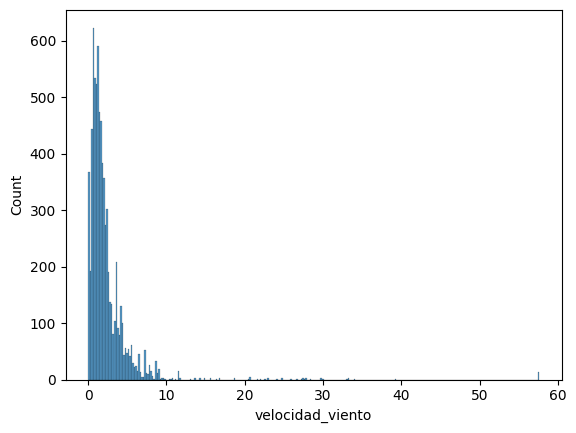

In [48]:
sns.histplot(df_climas['velocidad_viento'])

In [49]:
df_climas['dias_lluvia'].fillna(df4['dias_lluvia'].median(), inplace=True)
df_climas

<ipython-input-49-0fbef046822d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_climas['dias_lluvia'].fillna(df4['dias_lluvia'].median(), inplace=True)


,municipio,velocidad_viento,dias_lluvia,longitud,latitud
0,INZÁ,0.6,200.5,"-76,10","2,50"
1,INZÁ,0.6,276.7,"-76,17","2,45"
2,INZÁ,0.6,144.7,"-76,05","2,58"
3,INZÁ,0.6,227.4,"-76,16","2,24"
4,INZÁ,0.6,170.1,"-76,05","2,46"
...,...,...,...,...,...
7504,GUICÁN,15.7,171.8,"-72,38","6,41"
7505,PAIPA,0.7,107.9,"-73,07","5,70"
7506,PAIPA,0.7,189.7,"-73,16","5,97"
7507,PAIPA,0.7,169.2,"-73,20","5,90"


In [50]:
df_climas.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
longitud,772
latitud,772


In [51]:
df_climas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7509 entries, 0 to 7508
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         7509 non-null   object 
 1   velocidad_viento  7509 non-null   float64
 2   dias_lluvia       7509 non-null   float64
 3   longitud          6737 non-null   object 
 4   latitud           6737 non-null   object 
dtypes: float64(2), object(3)
memory usage: 293.4+ KB


In [52]:
clima= df_climas.groupby('municipio').agg({'velocidad_viento': 'mean', 'dias_lluvia': 'mean', 'longitud': 'first', 'latitud': 'first'}).reset_index()
clima

,municipio,velocidad_viento,dias_lluvia,longitud,latitud
0,ABRIAQUÍ,1.000000,200.600000,"-76,08","6,64"
1,ACANDÍ,1.413333,150.500000,"-77,28","8,53"
2,ACEVEDO,2.312254,157.650000,"-75,94","1,81"
3,AGUACHICA,1.071429,91.533333,"-73,60","8,23"
4,AGUSTÍN CODAZZI,1.442857,79.600000,"-73,24","10,04"
...,...,...,...,...,...
288,YOLOMBÓ,1.725129,152.300000,"-75,01","6,59"
289,YOPAL,3.600000,149.600000,"-72,39","5,32"
290,ZETAQUIRÁ,0.525000,179.000000,"-73,17","5,28"
291,ZIPAQUIRÁ,2.043952,147.350000,"-74,00","4,99"


<Axes: >

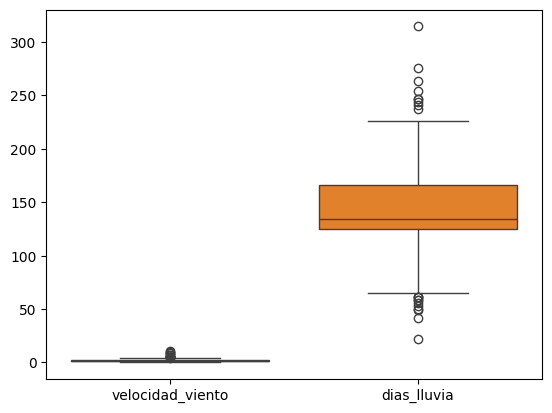

In [53]:
climas = clima[['velocidad_viento', 'dias_lluvia']]
sns.boxplot(climas)

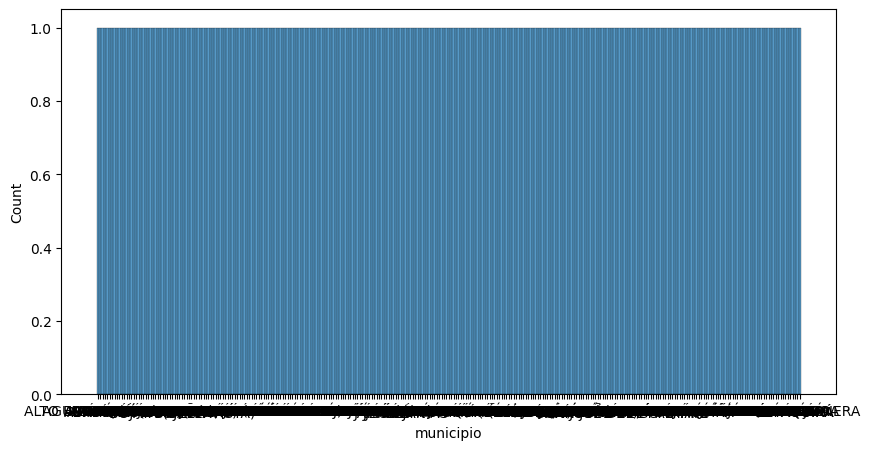

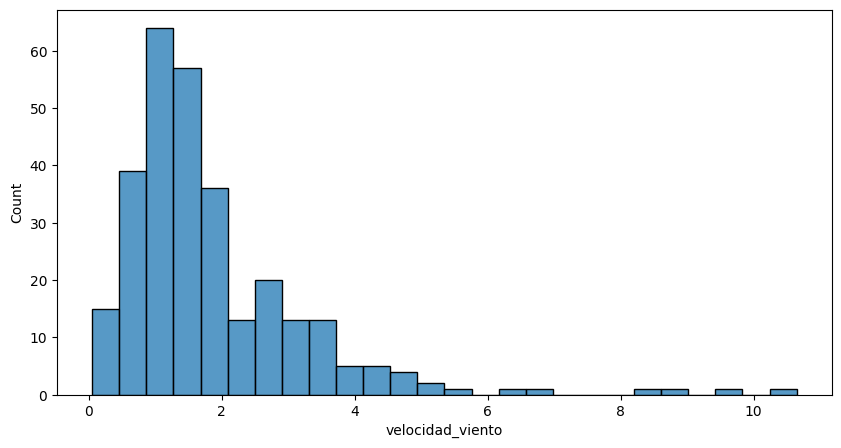

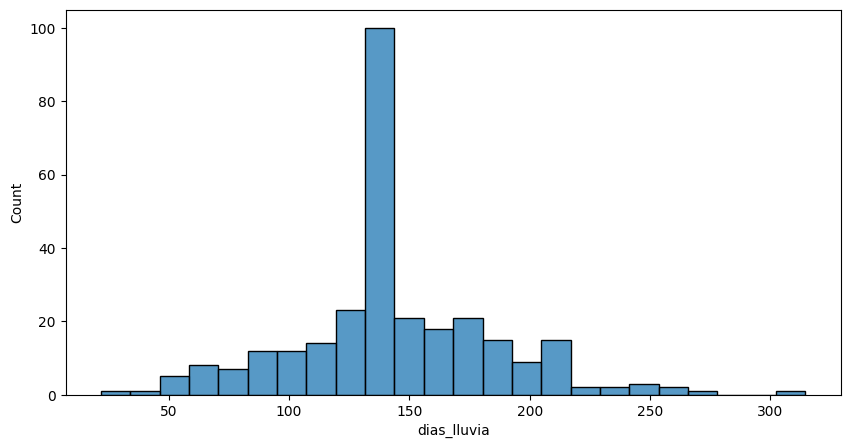

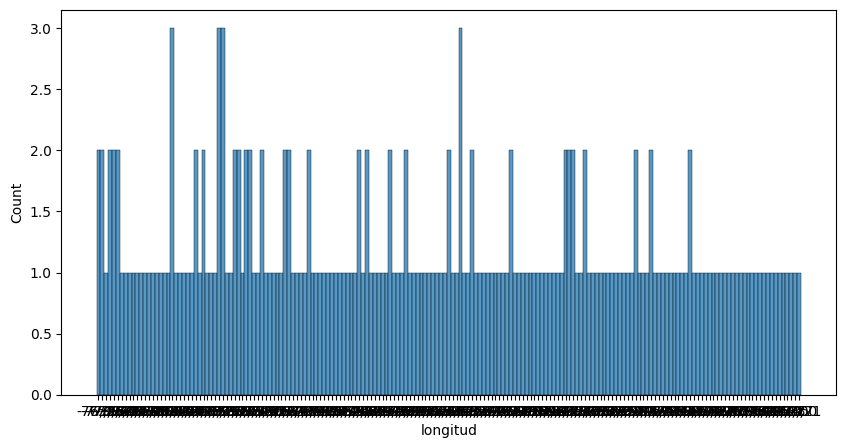

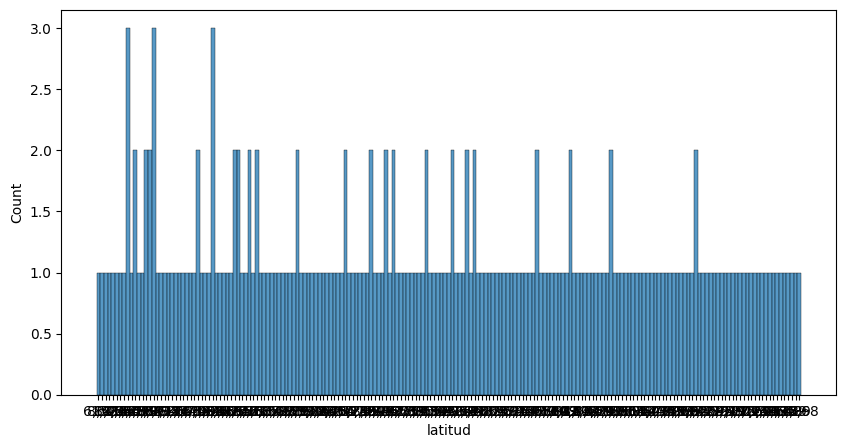

In [54]:
for col in clima.columns:

  plt.figure(figsize=(10, 5))

  sns.histplot(clima[col])

In [92]:
df_unificado1 = pd.merge(left= df1, right= df2, left_on='municipio', right_on= 'municipio', how='left')
df_unificado1

,municipio,potencia_m,energia_activa,energia_reactiva,proyectos_existentes
0,PUERTO NARIÑO,286.40,132215,41907.0,NaN
1,TARAPACA (ANM),102.60,28132,12662.0,NaN
2,VIGÍA DEL FUERTE,27.46,2686,1110.0,NaN
3,PROVIDENCIA,2190.28,1331271,284638.0,NaN
4,CARTAGENA DE INDIAS,247.59,64368,30561.0,Solar
...,...,...,...,...,...
4996,BUENAVENTURA,31.23,7610,3285.0,NaN
4997,CARURÚ,87.82,31775,7881.0,NaN
4998,MITÚ,3236.71,1590470,387197.0,NaN
4999,TARAIRA,136.84,39226,10719.0,NaN


In [93]:
df_unificado1.isnull().sum()

,0
municipio,0
potencia_m,0
energia_activa,0
energia_reactiva,0
proyectos_existentes,3794


In [94]:
df_unificado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   municipio             5001 non-null   object 
 1   potencia_m            5001 non-null   float64
 2   energia_activa        5001 non-null   int64  
 3   energia_reactiva      5001 non-null   float64
 4   proyectos_existentes  1207 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 195.5+ KB


In [95]:
df_unificado1['municipio'].value_counts()

,count
municipio,
CARTAGENA DE INDIAS,390
URIBIA,360
TIMBIQUÍ,314
UNGUÍA,306
LÓPEZ DE MICAY,222
...,...
VIGIA DEL FUERTE,1
MITU,1
TARAPACA,1


In [59]:
'''energia = df_unificado1.groupby('municipio').agg({'potencia_m': 'mean', 'energia_activa': 'mean', 'energia_reactiva': 'mean', 'proyectos_existentes': 'first'}).reset_index()
energia'''

"energia = df_unificado1.groupby('municipio').agg({'potencia_m': 'mean', 'energia_activa': 'mean', 'energia_reactiva': 'mean', 'proyectos_existentes': 'first'}).reset_index()\nenergia"

In [60]:
'''
df_unificado1['inversion'].fillna(df2['inversion'].median(), inplace=True)

df_unificado1'''

"\ndf_unificado1['inversion'].fillna(df2['inversion'].median(), inplace=True)\n\ndf_unificado1"

In [96]:
df_unificado2 = pd.merge(left = clima, right = df_unificado1, left_on='municipio', right_on= 'municipio', how='left')
df_unificado2

,municipio,velocidad_viento,dias_lluvia,longitud,latitud,potencia_m,energia_activa,energia_reactiva,proyectos_existentes
0,ABRIAQUÍ,1.000000,200.600000,"-76,08","6,64",NaN,NaN,NaN,NaN
1,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1554.78,598738.0,171032.0,NaN
2,ACANDÍ,1.413333,150.500000,"-77,28","8,53",878.68,420977.0,142002.0,NaN
3,ACANDÍ,1.413333,150.500000,"-77,28","8,53",77.66,17322.0,6530.0,NaN
4,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1579.60,682186.0,197644.0,NaN
...,...,...,...,...,...,...,...,...,...
2053,YOLOMBÓ,1.725129,152.300000,"-75,01","6,59",NaN,NaN,NaN,NaN
2054,YOPAL,3.600000,149.600000,"-72,39","5,32",NaN,NaN,NaN,NaN
2055,ZETAQUIRÁ,0.525000,179.000000,"-73,17","5,28",NaN,NaN,NaN,NaN
2056,ZIPAQUIRÁ,2.043952,147.350000,"-74,00","4,99",NaN,NaN,NaN,NaN


In [97]:
df_unificado2.isnull().sum()

,0
municipio,0
velocidad_viento,0
dias_lluvia,0
longitud,289
latitud,289
potencia_m,271
energia_activa,271
energia_reactiva,271
proyectos_existentes,1241


In [98]:
df_viabilidad = df_unificado2.dropna(subset =['potencia_m'])
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,longitud,latitud,potencia_m,energia_activa,energia_reactiva,proyectos_existentes
1,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1554.78,598738.0,171032.0,NaN
2,ACANDÍ,1.413333,150.500000,"-77,28","8,53",878.68,420977.0,142002.0,NaN
3,ACANDÍ,1.413333,150.500000,"-77,28","8,53",77.66,17322.0,6530.0,NaN
4,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1579.60,682186.0,197644.0,NaN
5,ACANDÍ,1.413333,150.500000,"-77,28","8,53",894.96,403800.0,128896.0,NaN
...,...,...,...,...,...,...,...,...,...
2033,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico
2034,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico
2035,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico
2036,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico


In [99]:
df_viabilidad.loc[:, 'viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)) .astype(int)
df_viabilidad

<ipython-input-99-d410cdfdb419>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viabilidad.loc[:, 'viabilidad'] = ((df_viabilidad['dias_lluvia'] < 150) | (df_viabilidad['velocidad_viento'] > 3.5)) .astype(int)


,municipio,velocidad_viento,dias_lluvia,longitud,latitud,potencia_m,energia_activa,energia_reactiva,proyectos_existentes,viabilidad
1,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1554.78,598738.0,171032.0,NaN,0
2,ACANDÍ,1.413333,150.500000,"-77,28","8,53",878.68,420977.0,142002.0,NaN,0
3,ACANDÍ,1.413333,150.500000,"-77,28","8,53",77.66,17322.0,6530.0,NaN,0
4,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1579.60,682186.0,197644.0,NaN,0
5,ACANDÍ,1.413333,150.500000,"-77,28","8,53",894.96,403800.0,128896.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2033,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2034,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2035,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2036,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1


In [100]:
columns_to_fill = ['proyectos_existentes','longitud','latitud']
df_viabilidad.loc[:, columns_to_fill] = df_viabilidad.loc[:, columns_to_fill].fillna('Ninguno')
df_viabilidad

,municipio,velocidad_viento,dias_lluvia,longitud,latitud,potencia_m,energia_activa,energia_reactiva,proyectos_existentes,viabilidad
1,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1554.78,598738.0,171032.0,Ninguno,0
2,ACANDÍ,1.413333,150.500000,"-77,28","8,53",878.68,420977.0,142002.0,Ninguno,0
3,ACANDÍ,1.413333,150.500000,"-77,28","8,53",77.66,17322.0,6530.0,Ninguno,0
4,ACANDÍ,1.413333,150.500000,"-77,28","8,53",1579.60,682186.0,197644.0,Ninguno,0
5,ACANDÍ,1.413333,150.500000,"-77,28","8,53",894.96,403800.0,128896.0,Ninguno,0
...,...,...,...,...,...,...,...,...,...,...
2033,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2034,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2035,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1
2036,URIBIA,4.556000,21.846667,"-71,98","12,22",267.36,40008.0,8714.0,Eólico,1


In [119]:
'''df_final = df_viabilidad.groupby('municipio').agg({
    'longitud': 'first',
    'latitud': 'first',
    'potencia_m': 'mean',
    'velocidad_viento': 'mean',
    'energia_activa': 'mean',
    'energia_reactiva': 'mean',
    'dias_lluvia': 'mean',
    'viabilidad': 'first',
    'proyectos_existentes': 'last'
}).reset_index()
df_final'''

,municipio,longitud,latitud,potencia_m,velocidad_viento,energia_activa,energia_reactiva,dias_lluvia,viabilidad,proyectos_existentes
0,ACANDÍ,"-77,28","8,53",3.276507,1.413333,4.060767,4.261992,0.192150,0,Ninguno
1,ALTO BAUDÓ (PIE DE PATO),"-76,97","5,52",-0.104065,0.633333,0.208620,0.147712,0.835384,0,Ninguno
2,BAHÍA SOLANO (MUTIS),"-77,40","6,22",1.924001,0.300000,2.867715,3.162849,1.319274,0,Ninguno
3,BOJAYÁ (BELLAVISTA),"-76,89","6,56",-0.119953,1.266667,0.089878,0.069238,0.828940,0,Ninguno
4,BUENAVENTURA,"-76,99","3,82",-0.205253,4.946667,0.029746,0.038176,1.409490,1,Ninguno
5,CARTAGENA,Ninguno,Ninguno,-0.380293,2.325000,-0.105757,-0.060624,0.000000,1,Ninguno
6,CIÉNAGA,"-74,03","10,77",0.178633,0.405307,0.754671,0.826579,-0.341535,1,Solar
7,GUAPI,Ninguno,Ninguno,-0.448432,1.466667,-0.223210,-0.195230,0.000000,1,Ninguno
8,INÍRIDA,"-67,84","3,96",10.290576,1.146154,14.161623,14.254857,0.531927,0,Solar
9,ISTMINA,"-76,69","5,16",-0.570659,0.971429,-0.292729,-0.293228,1.079672,0,Ninguno


In [120]:
df_viabilidad['viabilidad'].value_counts()

,count
viabilidad,
1,1081
0,706


<Axes: >

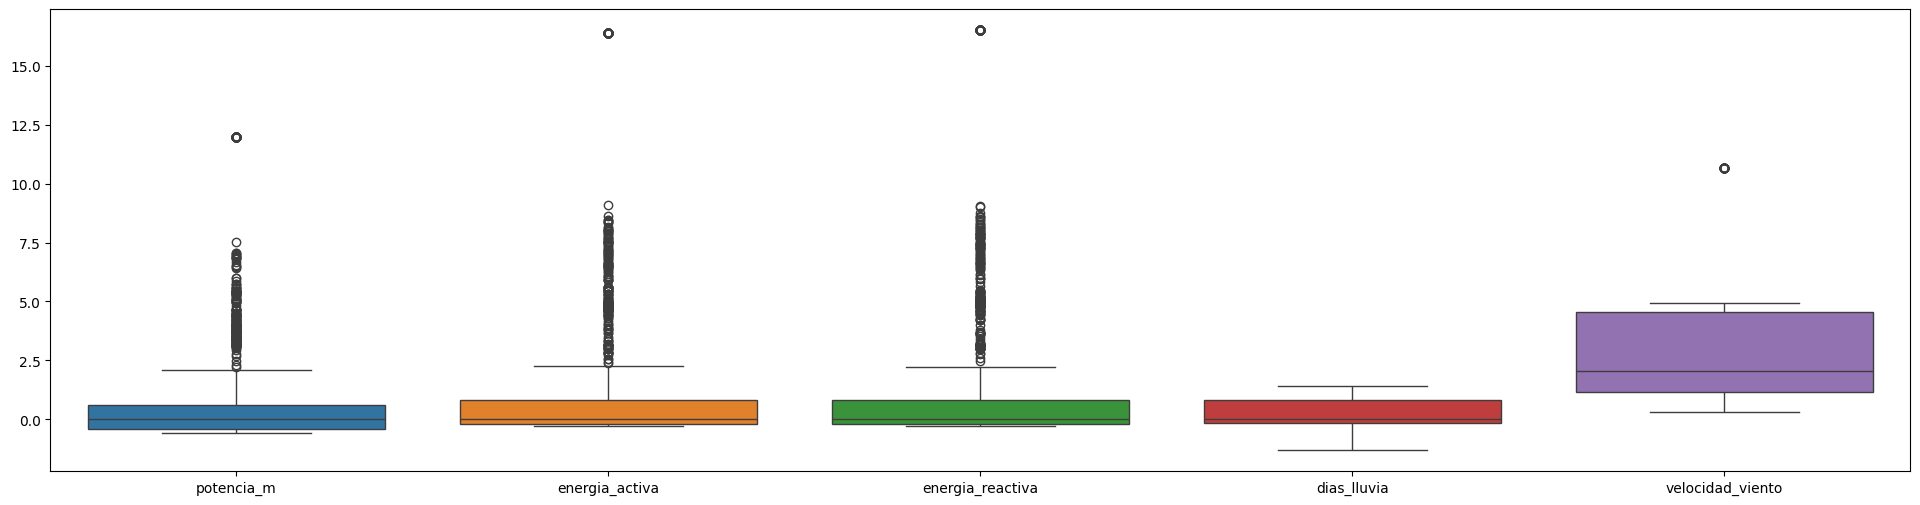

In [121]:
plt.figure(figsize=(24, 6))
variables = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva', 'dias_lluvia', 'velocidad_viento']]
sns.boxplot(variables)

In [103]:
from sklearn.preprocessing import RobustScaler
escalador = RobustScaler()

columns_to_scale = ['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva']
df_viabilidad.loc[:, columns_to_scale] = escalador.fit_transform(df_viabilidad.loc[:, columns_to_scale])
'''df_viabilidad['potencia_m'] = escalador.fit_transform(df_viabilidad[['potencia_m']])
df_viabilidad['velocidad_viento'] = escalador.fit_transform(df_viabilidad[['velocidad_viento']])
df_viabilidad['dias_lluvia'] = escalador.fit_transform(df_viabilidad[['dias_lluvia']])
df_viabilidad['energia_activa'] = escalador.fit_transform(df_viabilidad[['energia_activa']])
df_viabilidad['energia_reactiva'] = escalador.fit_transform(df_viabilidad[['energia_reactiva']])'''

"df_viabilidad['potencia_m'] = escalador.fit_transform(df_viabilidad[['potencia_m']])\ndf_viabilidad['velocidad_viento'] = escalador.fit_transform(df_viabilidad[['velocidad_viento']])\ndf_viabilidad['dias_lluvia'] = escalador.fit_transform(df_viabilidad[['dias_lluvia']])\ndf_viabilidad['energia_activa'] = escalador.fit_transform(df_viabilidad[['energia_activa']])\ndf_viabilidad['energia_reactiva'] = escalador.fit_transform(df_viabilidad[['energia_reactiva']])"

<Axes: >

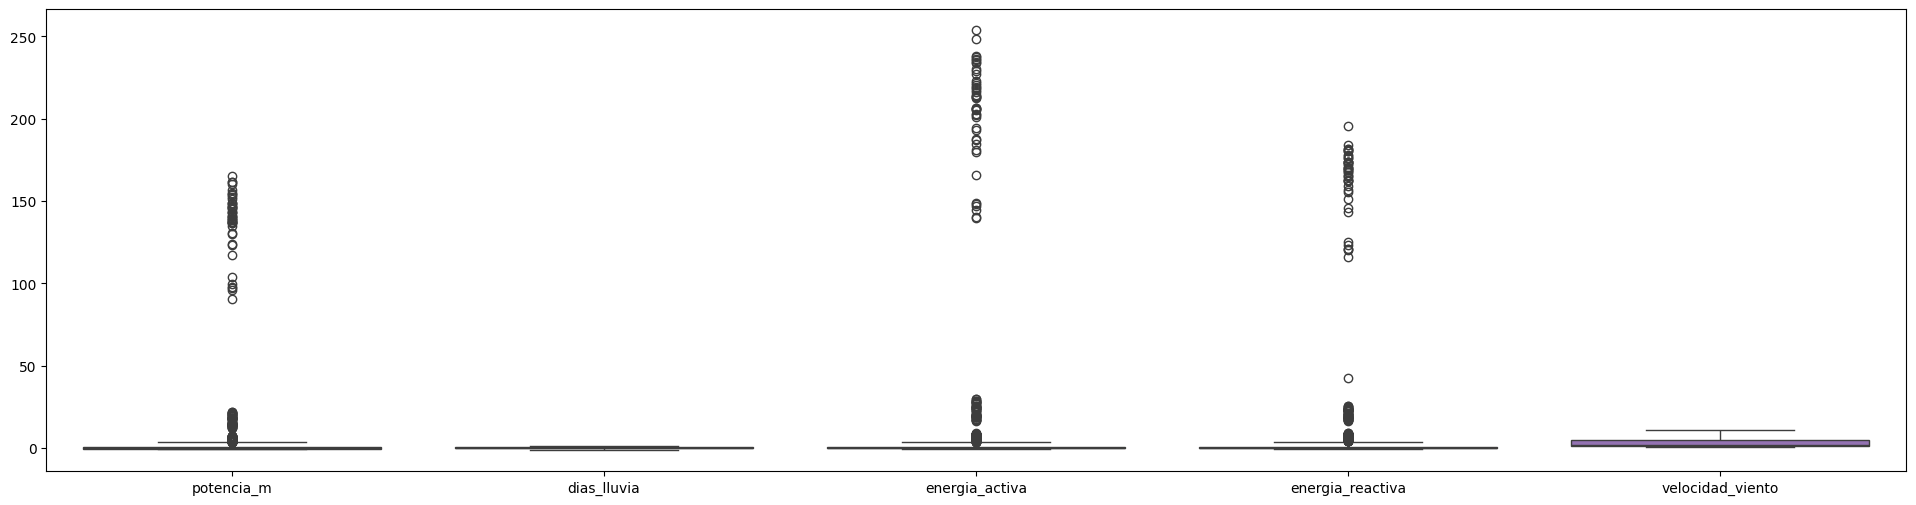

In [104]:
plt.figure(figsize=(24, 6))
vari = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(vari, whis=3)

<Axes: >

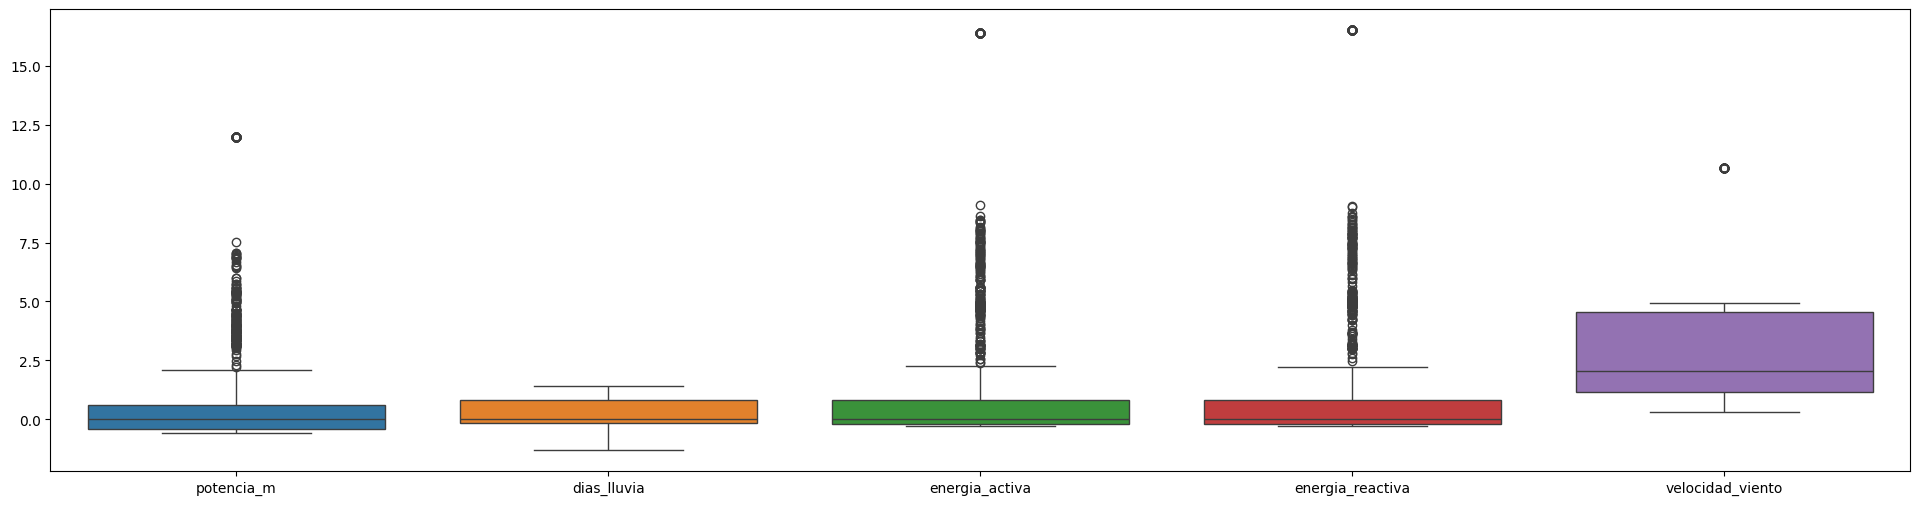

In [106]:
from scipy.stats.mstats import winsorize

variables_to_winzorize = ['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva']

# Convert the selected columns to a NumPy array before applying winsorize
for var in variables_to_winzorize:
    df_viabilidad.loc[:, var] = winsorize(df_viabilidad.loc[:, var].values, limits=[0.05, 0.05])
    # .values extracts the underlying NumPy array from the Pandas Series

plt.figure(figsize=(24, 6))
v = df_viabilidad[['potencia_m','dias_lluvia', 'energia_activa', 'energia_reactiva', 'velocidad_viento']]
sns.boxplot(v)

<Axes: >

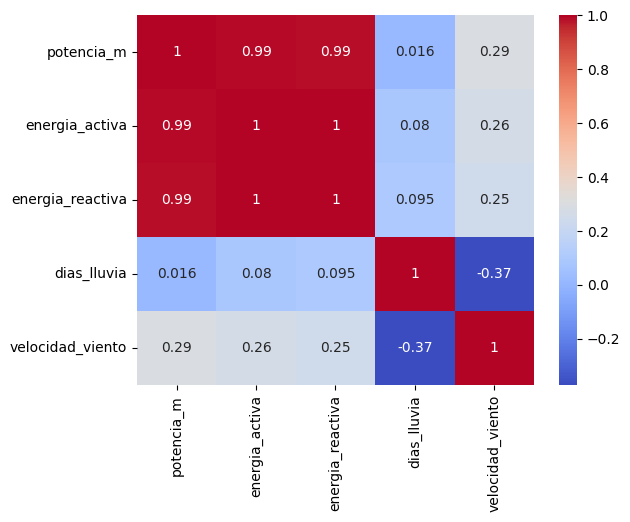

In [122]:
correlacion = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva','dias_lluvia', 'velocidad_viento']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

Modelo de clasificación NAIVE BAYES

In [123]:
x = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva']] #'dias_lluvia', 'velocidad_viento'
y = df_viabilidad['viabilidad']

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, test_size=0.2, random_state=42)

#Modelo
naive_model = GaussianNB()
naive_model.fit(x_entrenamiento, y_entrenamiento)
predicciones = naive_model.predict(x_prueba)


#Evaluación del modelo
print(classification_report(y_prueba, predicciones))
print('Accuracy:', accuracy_score(y_prueba, predicciones))

              precision    recall  f1-score   support

           0       0.52      0.17      0.26       134
           1       0.65      0.91      0.75       224

    accuracy                           0.63       358
   macro avg       0.58      0.54      0.51       358
weighted avg       0.60      0.63      0.57       358

Accuracy: 0.6312849162011173


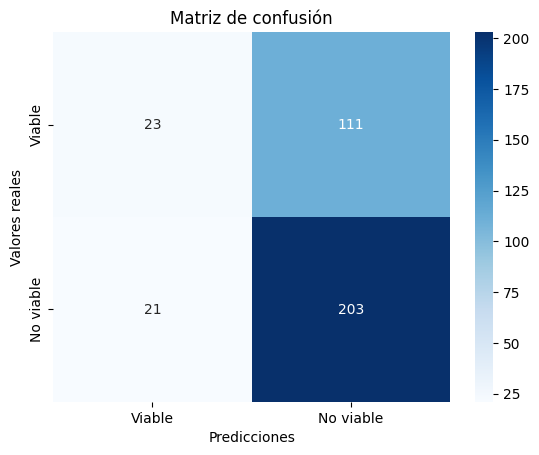

In [126]:
matriz1 = confusion_matrix(y_prueba, predicciones)
labels = ['Viable', 'No viable']

sns.heatmap(matriz1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Modelo de Clasificación REGRESIÓN LOGÍSTICA

In [129]:
x2 = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva']]
y2 = df_viabilidad['viabilidad']

x2_entrenamiento, x2_prueba, y2_entrenamiento, y2_prueba = train_test_split(x2, y2, test_size=0.2, random_state=42)

#Modelo
logistic_model = LogisticRegression()
logistic_model.fit(x2_entrenamiento, y2_entrenamiento)
predicciones2 = logistic_model.predict(x2_prueba)


#Evaluación del modelo
print(classification_report(y2_prueba, predicciones2))
print('Accuracy:', accuracy_score(y2_prueba, predicciones2))

              precision    recall  f1-score   support

           0       0.58      0.19      0.29       134
           1       0.65      0.92      0.76       224

    accuracy                           0.65       358
   macro avg       0.62      0.55      0.53       358
weighted avg       0.63      0.65      0.59       358

Accuracy: 0.6452513966480447


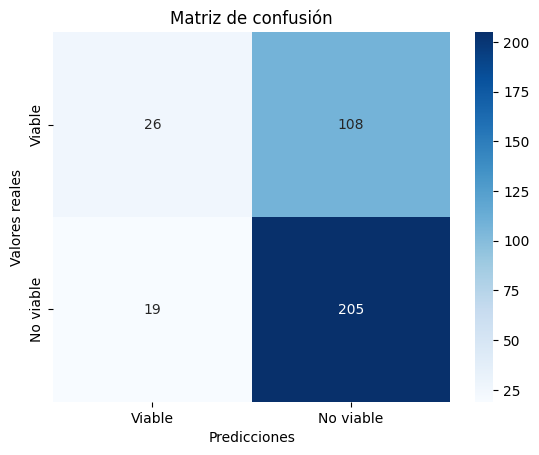

In [130]:
matriz2 = confusion_matrix(y2_prueba, predicciones2)
labels = ['Viable', 'No viable']

sns.heatmap(matriz2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

Modelo de clasificación RANDOM FOREST REGRESSOR

In [131]:
x3 = df_viabilidad[['potencia_m', 'energia_activa', 'energia_reactiva']]
y3 = df_viabilidad['viabilidad']

x3_entrenamiento, x3_prueba, y3_entrenamiento, y3_prueba = train_test_split(x3, y3, test_size=0.2, random_state=42)

#Modelo
forest_model = RandomForestClassifier()
forest_model.fit(x3_entrenamiento, y3_entrenamiento)
predicciones3 = forest_model.predict(x3_prueba)


#Evaluación del modelo
print(classification_report(y3_prueba, predicciones3))
print('Accuracy:', accuracy_score(y3_prueba, predicciones3))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       134
           1       0.87      0.92      0.89       224

    accuracy                           0.86       358
   macro avg       0.86      0.84      0.85       358
weighted avg       0.86      0.86      0.86       358

Accuracy: 0.8631284916201117


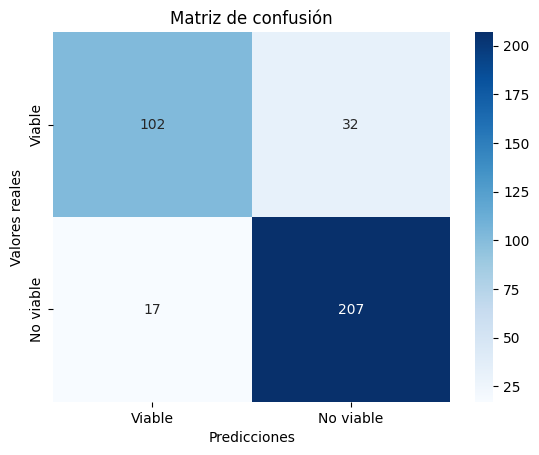

In [132]:
matriz3 = confusion_matrix(y3_prueba, predicciones3)
labels = ['Viable', 'No viable']

sns.heatmap(matriz3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()